# The Reuter Corp

# Question: What question(s) are you trying to answer?

The question I aim to answer in the following file is which authors predominantly report on 'good' or 'bad' news. To define these categories, I allocated words to either 'good' or 'bad' based on whether they most commonly occurred in positive or negative news stories.

# Approach: What approach/statistical tool did you use to answer the questions?


I used NLTK package to calulcate polarity scores of the news. After compiling all the data, I tokenized, lemanzied, and removed stop words from the article texts. From there, I used the Sentiment Insensitivity Analyzer to obtain how positive, negative, or neutral the text was. I aggregated the the scores for each author by average total score (compound score). 

For the top words, I analyzed the first sentence of each article since the headline and leading sentence is generally the most informative part of an article. First, I filtered to see only the really negative or really positive news. Then, I extracted the really positive/negative words of each leading sentence within each article, made it a large list, and found the top 10 most common words for each category.  

# Results: What evidence/results did your approach provide to answer the questions? (E.g. any numbers, tables, figures as appropriate.)


I created a data table ranking the "best" news reporting authors to "worst" news reporting authors. 

I also created a wordcloud to show the 10 most popular words from both "good" and "bad" news articles. 

# Conclusion: What are your conclusions about your questions? Provide a written interpretation of your results, understandable to stakeholders who might plausibly take an interest in this data set.

Some of the most common words for the "bad" news category were Beijing, Columbia, state, officials, and securities. This tells us that "bad" news tends to focus on global issues or financial crises where state officials might have been involved. Some of the most common words appearing in "good" news were market, new, company, profits, and percent. This demonstrates that "good news tends to be news on increasing revenues, maybe with something new entering the market. The most common "good" word was British, so this shows that news that was really good tend to deal with the British.

According to my table below, Kieth Wier tends to report on more "good" news than the other authors. Karl Penhaul is on the opposite side of the spectrum as he reports on the "worst" news out of the authors in Reuters. It could be inferred from this classification that Kieth Wier tends to write about business related topics while Karl tends to write about global conflicts. 

In [1]:
import pandas as pd
import glob
import os
import re

In [2]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

Get all texts from CS50test into dataframe

In [3]:
# Define the path to the directory containing all author folders
test_directory_path = "ReutersC50/C50test/"

# Get a list of all author folders
author_folders = glob.glob(os.path.join(test_directory_path, "*"))

# Initialize lists to store author names and text
authors = []
texts = []

# Loop through each author folder
for author_folder in author_folders:
    # Get the author's name from the folder name
    author_name = os.path.basename(author_folder)

    # Get a list of all text files in the current author's folder
    file_paths = glob.glob(os.path.join(author_folder, "*.txt"))

    # Loop through each file and read the content
    for file_path in file_paths:
        with open(file_path, "r") as file:
            # Read the entire content of the file
            file_text = file.read()

            # Append the author and text to the lists
            authors.append(author_name)
            texts.append(file_text)

# Create a DataFrame from the lists
CS50test = pd.DataFrame({"Author": authors, "Text": texts})

Get all texts from CS50train into dataframe

In [4]:
# Define the path to the directory containing all author folders
train_directory_path = "ReutersC50/C50test/"

# Get a list of all author folders
author_folders = glob.glob(os.path.join(train_directory_path, "*"))

# Initialize lists to store author names and text
authors = []
texts = []

# Loop through each author folder
for author_folder in author_folders:
    # Get the author's name from the folder name
    author_name = os.path.basename(author_folder)

    # Get a list of all text files in the current author's folder
    file_paths = glob.glob(os.path.join(author_folder, "*.txt"))

    # Loop through each file and read the content
    for file_path in file_paths:
        with open(file_path, "r") as file:
            # Read the entire content of the file
            file_text = file.read()

            # Append the author and text to the lists
            authors.append(author_name)
            texts.append(file_text)

# Create a DataFrame from the lists
CS50train = pd.DataFrame({"Author": authors, "Text": texts})

Combine into main df, sort, and reset index, and space 

In [5]:
Reuters = pd.concat([CS50test, CS50train], axis=0, ignore_index=True)

Reuters.sort_values(by="Author", inplace=True)
Reuters.reset_index(inplace=True, drop=True)


def format_name(full_name):
    # Regular expression to split at the transition from lowercase to uppercase
    parts = re.split(r"(?<!^)(?=[A-Z])", full_name)
    first_name = parts[0]
    last_name = "".join(parts[1:]) if len(parts) > 1 else ""
    return f"{first_name} {last_name}"


Reuters["Author"] = Reuters["Author"].apply(format_name)

Reuters

,Author,Text
0,Aaron Pressman,The Federal Reserve may not be taking adequate...
1,Aaron Pressman,Privacy advocates warned Wednesday that the Cl...
2,Aaron Pressman,Federal Reserve Chairman Alan Greenspan urged ...
3,Aaron Pressman,The chairman of an influential National Resear...
4,Aaron Pressman,The U.S. government is scrambling to update th...
...,...,...
4995,William Kazer,A Chinese ideologue known for his strictly ort...
4996,William Kazer,A top Chinese official for contacts with Taiwa...
4997,William Kazer,Premier Li Peng said on Friday China wanted a ...
4998,William Kazer,"China's central bank, stung by the collapse of..."


# Start of NLTK analysis

Processing

In [6]:
random_row = Reuters.sample(n=1)
random_text = random_row["Text"].values[0]


def get_first_sentence(text):
    sentences = sent_tokenize(text)
    return sentences[0]


first_sentence = get_first_sentence(random_text)

In [7]:
def preprocess_text(text):

    # Tokenize the text
    tokens = word_tokenize(text.lower())

    # Remove stop words
    filtered_tokens = [
        token for token in tokens if token not in stopwords.words("english")
    ]

    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    # Join the tokens back into a string
    processed_text = " ".join(lemmatized_tokens)

    return processed_text

Get sentiment, right now getting for whole text and just first sentence

In [8]:
def get_first_sentence(text):
    sentences = sent_tokenize(text)
    return sentences[0]


first_sentence = get_first_sentence(random_text)

analyzer = SentimentIntensityAnalyzer()


def get_sentiment(text):

    scores = analyzer.polarity_scores(text)

    return scores


processed_rtext = preprocess_text(random_text)
random_score = get_sentiment(processed_rtext)

processed_rfsent = preprocess_text(first_sentence)
random_firstsent_score = get_sentiment(processed_rfsent)

print(random_text)
print(random_score)

print(first_sentence)
print(random_firstsent_score)

A huge bid by Britain's Cable and Wireless Plc (C&amp;W) for America's Sprint Corp may be possible but does not look feasible in the short term, analysts said on Wednesday.
C&amp;W, Britain's second biggest telecommunications group, declined to comment on a Wall Street Journal report that it was mulling a possible $15 billion bid for 80 percent of Sprint to create a telecoms giant spanning the United States and key European and Asian hubs.
Analysts have long tipped an alliance called Global One between Sprint, America's third long-distance telecoms group, German giant Deutsche Telekom AG and France Telecom as the "perfect partner" for C&amp;W.
But some said the report that C&amp;W was considering buying the 80 percent of Sprint not already owned by the French and Germans appeared premature.
Oliver Ehrenberg, telecommunications analyst at Robert Fleming Securities, said he thought such a bid was not feasible as Cable and Wireless was still completing a complicated cable merger with two 

Apply Work to dataframe

In [9]:
# FS means First Sentence

Reuters[["negativity", "neutrality", "positivity", "compound"]] = Reuters["Text"].apply(
    lambda x: pd.Series(get_sentiment(x))
)
Reuters[["FS_negativity", "FS_neutrality", "FS_positivity", "FS_compound"]] = Reuters[
    "Text"
].apply(lambda x: pd.Series(get_sentiment(get_first_sentence(x))))

Reuters.head()

,Author,Text,negativity,neutrality,positivity,compound,FS_negativity,FS_neutrality,FS_positivity,FS_compound
0,Aaron Pressman,The Federal Reserve may not be taking adequate...,0.106,0.844,0.049,-0.9703,0.093,0.842,0.064,-0.0428
1,Aaron Pressman,Privacy advocates warned Wednesday that the Cl...,0.041,0.845,0.113,0.9939,0.151,0.849,0.000,-0.4404
2,Aaron Pressman,Federal Reserve Chairman Alan Greenspan urged ...,0.036,0.867,0.096,0.9202,0.061,0.875,0.064,0.0258
3,Aaron Pressman,The chairman of an influential National Resear...,0.059,0.816,0.125,0.9794,0.000,0.879,0.121,0.4404
4,Aaron Pressman,The U.S. government is scrambling to update th...,0.074,0.878,0.048,-0.9751,0.000,1.000,0.000,0.0000


In [12]:
Reuters.groupby("Author")[["compound", "FS_compound"]].mean().sort_values(
    by="compound", ascending=False
)

,compound,FS_compound
Author,,
Keith Weir,0.916228,0.325740
Kirstin Ridley,0.887020,0.162108
Kevin Morrison,0.875670,0.154484
Jonathan Birt,0.868678,0.243026
Samuel Perry,0.841894,0.210518
Tim Farrand,0.834124,0.398762
David Lawder,0.827170,0.137932
Jo Winterbottom,0.814380,0.163330
Eric Auchard,0.795136,0.109186


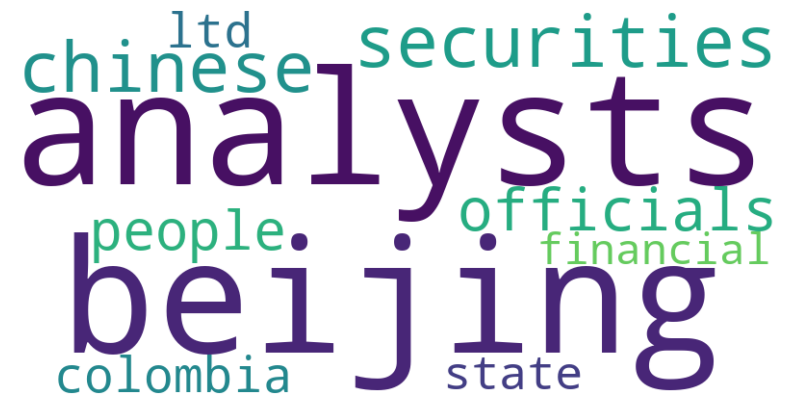

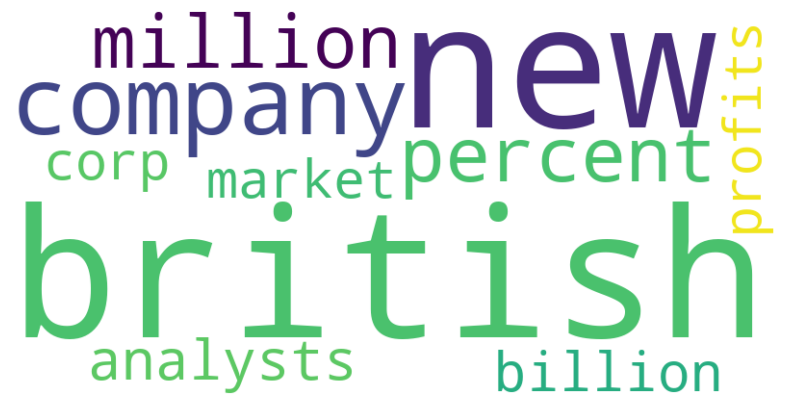

In [11]:
# Assuming your dataframe is named df and has a column 'article_text' with the articles
# Extract the first sentence of each article
Reuters["first_sentence"] = Reuters["Text"].apply(lambda x: sent_tokenize(x)[0])


# Define a list of additional words to exclude
additional_stopwords = {
    "said",
    "monday",
    "tuesday",
    "wednesday",
    "thursday",
    "friday",
    "saturday",
    "sunday",
    "china",
    "group",
    "year",
    "plc",
}

# Combine with the existing stopwords
stop_words = set(stopwords.words("english")).union(additional_stopwords)

# Update the filtering step to use the extended stopwords list
Reuters["first_sentence_words"] = Reuters["first_sentence"].apply(
    lambda x: [
        word.lower()
        for word in word_tokenize(x)
        if word.isalpha() and word.lower() not in stop_words
    ]
)


Reuters_Bad = Reuters[Reuters["compound"] < -0.90]
Reuters_Good = Reuters[Reuters["compound"] > 0.90]

# Flatten the list of words from all first sentences into a single list
bad_words = [word for words in Reuters_Bad["first_sentence_words"] for word in words]
good_words = [word for words in Reuters_Good["first_sentence_words"] for word in words]

# Find the top 10 most common words
top_10_BadWords = Counter(bad_words).most_common(10)
top_10_GoodWords = Counter(good_words).most_common(10)

# Generate the word cloud
Badwordcloud = WordCloud(
    width=800, height=400, background_color="white"
).generate_from_frequencies(dict(top_10_BadWords))
Goodwordcloud = WordCloud(
    width=800, height=400, background_color="white"
).generate_from_frequencies(dict(top_10_GoodWords))

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(Badwordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(Goodwordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()